Notebook for Ridge algorithm training and hyperparameter tuning

In [1]:
import numpy as np
import pandas as pd
import os
import sys

import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Path
try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
pipeline_path = os.path.join(parent_dir, 'Pipeline')
sys.path.append(pipeline_path)

from build_a_pipeline import build_pipeline_P0_foward_price


# Model 1

# P0 

In [3]:
X_train, X_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = "P0")


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=37897397308-8h2dck33fj91dilfohpi99n9pbuaejt0.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A63125%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=s5D1EwGeIaUIK0WYNsMI9pzkWezahM&access_type=offline


In [ ]:
# Define the range of alpha values to test
alphas = [0.0005, 0.0007, 0.0008,0.0009,0.1, 0.17, 0.5, 1.0, 1.5, 2.0, 5.0, 8]

In [ ]:
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring="neg_mean_squared_error")

# Step 2: Fit the model to the training data
ridge_cv.fit(X_train, y_train)

# Step 3: Get the best alpha and evaluate on validation data
best_alpha = ridge_cv.alpha_
y_val_pred = ridge_cv.predict(X_val)

# Calculate validation metrics
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Best Alpha: {best_alpha}")
print(f"Validation RMSE: {rmse}")
print(f"Validation R²: {r2}")

# Document results
results = pd.DataFrame({
    "Model Parameter": [f"Alpha: {best_alpha}"],
    "Pipeline Parameters": ["Default settings"],
    "RMSE": [rmse],
    "R²": [r2],
    "Target": ["P0"]
})

results

Best Alpha: 0.0005
Validation RMSE: 48.700050964735766
Validation R²: -35.66789897191696


,Model Parameter,Pipeline Parameters,RMSE,R²,Target
0,Alpha: 0.0005,Default settings,48.700051,-35.667899,P0


# P1

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = "P1")


In [ ]:
# Define the range of alpha values to test
alphas = [0.3, 0.3731, 0.3732, 0.3736]
ridge_cv = RidgeCV(alphas=alphas, scoring="neg_mean_squared_error")

# Step 2: Fit the model to the training data
ridge_cv.fit(X_train, y_train)

# Step 3: Get the best alpha and evaluate on validation data
best_alpha = ridge_cv.alpha_
y_val_pred = ridge_cv.predict(X_val)

# Calculate validation metrics
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Best Alpha: {best_alpha}")
print(f"Validation RMSE: {rmse}")
print(f"Validation R²: {r2}")

# Document results
results = pd.DataFrame({
    "Model Parameter": [f"Alpha: {best_alpha}"],
    "Pipeline Parameters": ["Default settings"],
    "RMSE": [rmse],
    "R²": [r2],
    "Target": ["P1"]
})

results

Best Alpha: 0.3736
Validation RMSE: 22.983029599364514
Validation R²: -10.651628435801898


,Model Parameter,Pipeline Parameters,RMSE,R²,Target
0,Alpha: 0.3736,Default settings,22.98303,-10.651628,P1


# Model 2

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = "P0", remove_outliers=True)


In [ ]:
# Define the range of alpha values to test
alphas = [ 0.0005, 0.0007, 0.0008,0.0009,0.1, 0.17, 0.5, 1.0, 1.5, 2.0, 5.0, 8]

In [ ]:
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring=None)

# Step 2: Fit the model to the training data
ridge_cv.fit(X_train, y_train)

# Step 3: Get the best alpha and evaluate on validation data
best_alpha = ridge_cv.alpha_
y_val_pred = ridge_cv.predict(X_val)

# Calculate validation metrics
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Best Alpha: {best_alpha}")
print(f"Validation RMSE: {rmse}")
print(f"Validation R²: {r2}")

# Document results
results = pd.DataFrame({
    "Model Parameter": [f"Alpha: {best_alpha}"],
    "Pipeline Parameters": ["Default settings"],
    "RMSE": [rmse],
    "R²": [r2],
    "Target": ["P0"]
})

results

Best Alpha: 8.0
Validation RMSE: 16.257905552716974
Validation R²: -3.7143668714234597


,Model Parameter,Pipeline Parameters,RMSE,R²,Target
0,Alpha: 8.0,Default settings,16.257906,-3.714367,P0


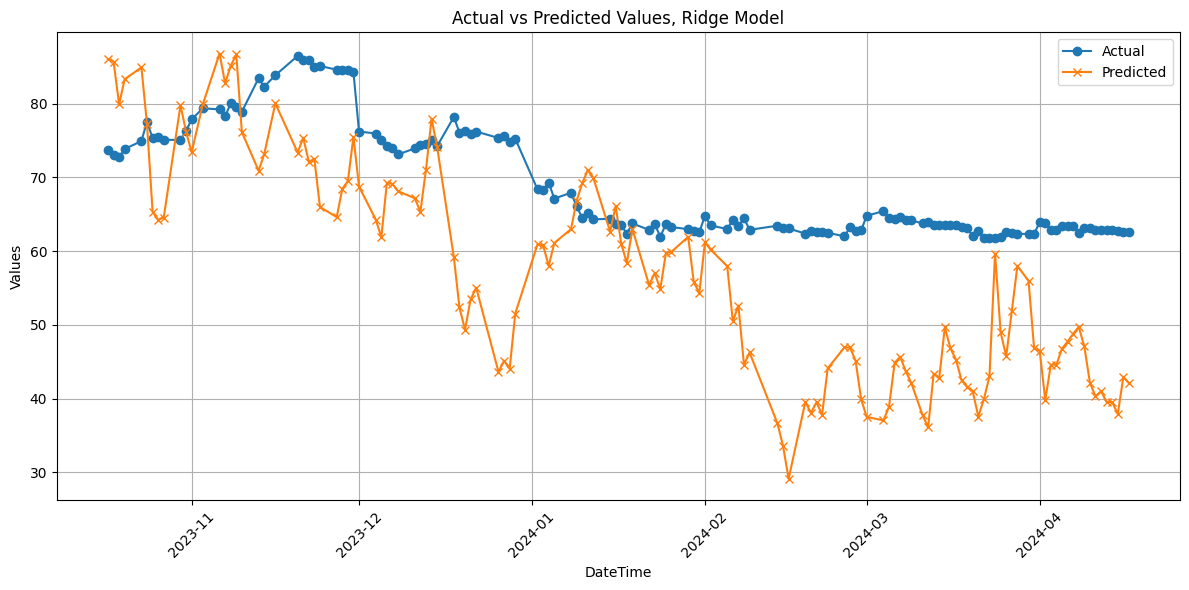

In [ ]:

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(X_val.index, y_val, label='Actual', marker='o')
plt.plot(X_val.index, y_val_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values, Ridge Model')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# P1

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = "P1", remove_outliers=True )


In [ ]:
# Define the range of alpha values to test
alphas = [0.1, 0.15, 0.16, 0.17,0.18, 0.26, 0.3, 1]

In [ ]:
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring="neg_mean_squared_error")

# Step 2: Fit the model to the training data
ridge_cv.fit(X_train, y_train)

# Step 3: Get the best alpha and evaluate on validation data
best_alpha = ridge_cv.alpha_
y_val_pred = ridge_cv.predict(X_val)

# Calculate validation metrics
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Best Alpha: {best_alpha}")
print(f"Validation RMSE: {rmse}")
print(f"Validation R²: {r2}")

# Document results
results = pd.DataFrame({
    "Model Parameter": [f"Alpha: {best_alpha}"],
    "Pipeline Parameters": ["Default settings"],
    "RMSE": [rmse],
    "R²": [r2],
    "Target": ["P1"]
})

results

Best Alpha: 0.3
Validation RMSE: 21.067026568782843
Validation R²: -8.950425968745693


,Model Parameter,Pipeline Parameters,RMSE,R²,Target
0,Alpha: 0.3,Default settings,21.067027,-8.950426,P1


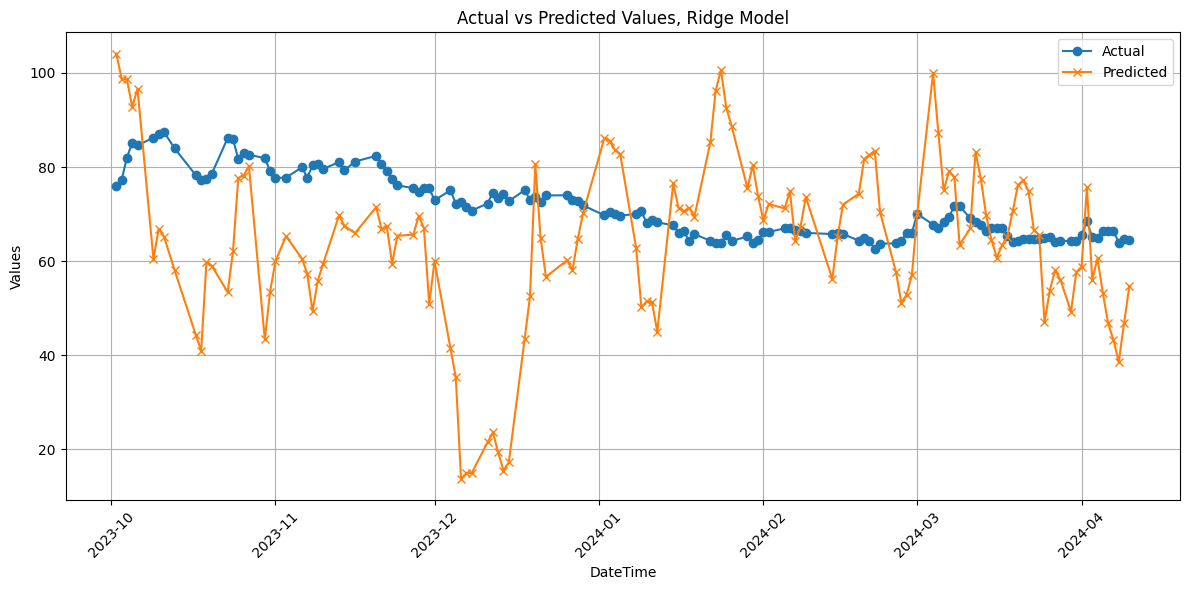

In [ ]:

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(X_val.index, y_val, label='Actual', marker='o')
plt.plot(X_val.index, y_val_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values, Ridge Model')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()